<a href="https://colab.research.google.com/github/Noel1805/Inteligencia_Artificial/blob/main/Arbol_Desicion_Titanic_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen General del Análisis de Supervivencia del Titanic

Este análisis se centra en predecir la supervivencia de los pasajeros del Titanic utilizando las características de 'Clase de Pasajero' (Pclass), 'Sexo' (Sex) y 'Edad' (Age). Se emplearon dos modelos de clasificación principales: Regresión Logística y Árbol de Decisión.

## 1. Carga y Preprocesamiento de Datos
Se cargaron los datos del archivo `titanic-train.csv`. Las columnas seleccionadas fueron 'Survived', 'Pclass', 'Sex' y 'Age'. La columna 'Sex' se transformó a valores numéricos (0 para masculino, 1 para femenino) y se eliminaron las filas con valores faltantes, principalmente en la columna 'Age'. Los datos se dividieron en conjuntos de entrenamiento y prueba para evaluar el rendimiento de los modelos.

## 2. Modelado con Regresión Logística
Se entrenó un modelo de Regresión Logística para identificar la influencia de cada característica en la probabilidad de supervivencia. Los coeficientes del modelo revelaron lo siguiente:
*   **Sexo (Sex):** Coeficiente positivo alto ($\approx 2.53$). Este es el factor más influyente, indicando que ser mujer aumenta significativamente la probabilidad de supervivencia.
*   **Clase de Pasajero (Pclass):** Coeficiente negativo alto ($\approx -1.25$). Ser de una clase inferior (número de clase más alto) disminuye considerablemente la probabilidad de supervivencia.
*   **Edad (Age):** Coeficiente negativo bajo ($\approx -0.04$). Un aumento en la edad reduce ligeramente la probabilidad de sobrevivir.

## 3. Modelado con Árbol de Decisión
Se entrenó un modelo de Árbol de Decisión con una profundidad máxima de 3 para visualizar el proceso de toma de decisiones. El árbol muestra cómo el modelo clasifica a los pasajeros basándose en una serie de reglas. Por ejemplo, el 'Sexo' suele ser el primer punto de división importante.

### Importancia de las Características (Árbol de Decisión)
El análisis de la importancia de las características para el árbol de decisión arrojó resultados consistentes con la regresión logística:
*   **Sexo (Sex):** Con una importancia de Gini de aproximadamente 0.425, es la característica más importante.
*   **Edad (Age):** Con una importancia de Gini de aproximadamente 0.404, es la segunda característica más importante.
*   **Clase de Pasajero (Pclass):** Con una importancia de Gini de aproximadamente 0.170, es la menos influyente de las tres.

## 4. Evaluación del Modelo (Curva ROC y AUC)
La curva ROC (Receiver Operating Characteristic) y el Área Bajo la Curva (AUC) se utilizaron para evaluar el rendimiento del modelo de Árbol de Decisión en la clasificación.
*   **AUC ($\approx 0.810$):** Un valor de AUC de aproximadamente 0.810 indica que el modelo tiene una buena capacidad para distinguir entre pasajeros que sobrevivieron y los que no. Un AUC de 0.81 significa que hay una probabilidad del 81% de que el modelo clasifique correctamente un par aleatorio de sobreviviente/no sobreviviente.
*   **Falsos Positivos (FPR):** Representa la tasa de individuos predichos como sobrevivientes cuando en realidad no lo fueron.
*   **Verdaderos Positivos (TPR):** Representa la tasa de individuos predichos correctamente como sobrevivientes (sensibilidad).

## Conclusión
Ambos modelos, Regresión Logística y Árbol de Decisión, concuerdan en que el **Sexo es el factor más determinante para la supervivencia en el Titanic**, con las mujeres teniendo una probabilidad significativamente mayor de sobrevivir. La **Clase de Pasajero** también juega un rol crucial, donde las clases superiores tienen mayores tasas de supervivencia. La **Edad** tiene un impacto menor pero consistente, con personas más jóvenes mostrando una ligera ventaja. La capacidad predictiva del modelo de Árbol de Decisión, evidenciada por un AUC de 0.810, sugiere que estas características son buenos predictores de supervivencia.

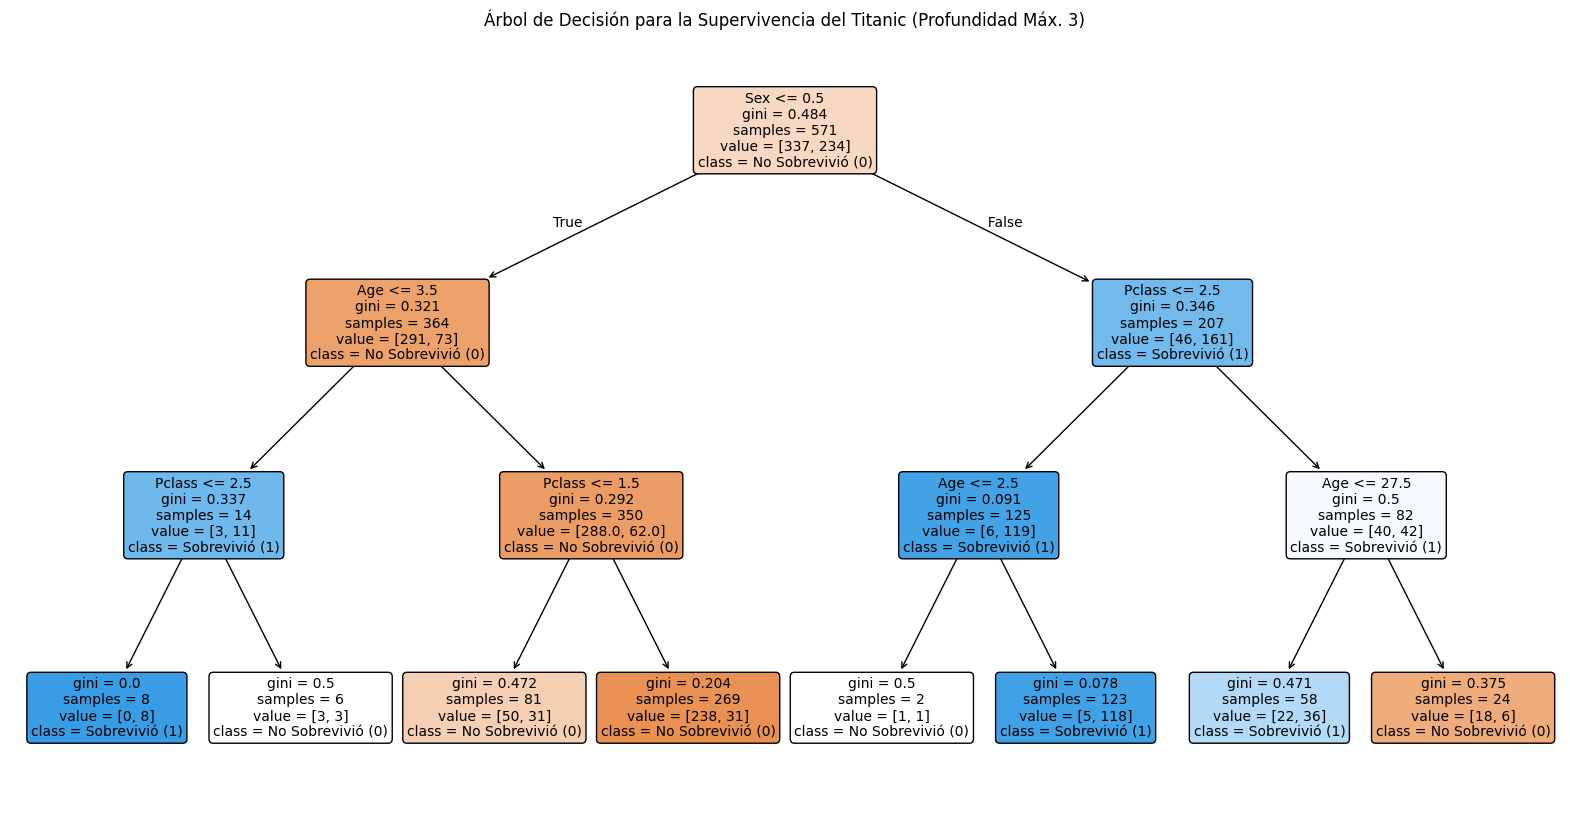

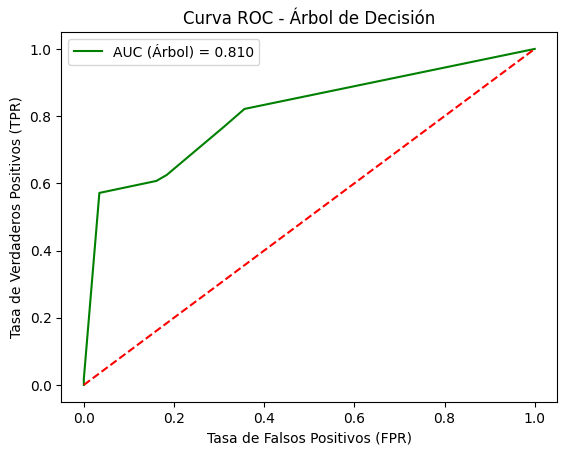


El valor AUC para el Árbol de Decisión es: 0.810


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
df = pd.read_csv("/content/titanic-train.csv")

df = df[["Survived", "Pclass", "Sex", "Age"]]

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    rounded=True,
    feature_names=X.columns.tolist(),
    class_names=['No Sobrevivió (0)', 'Sobrevivió (1)'],
    fontsize=10
)
plt.title("Árbol de Decisión para la Supervivencia del Titanic (Profundidad Máx. 3)")
plt.show()


y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"AUC (Árbol) = {auc_dt:.3f}", color='green') # Changed color to green
plt.plot([0, 1], [0, 1], "--", color='red') # Changed color to red
plt.title("Curva ROC - Árbol de Decisión")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()

print(f"\nEl valor AUC para el Árbol de Decisión es: {auc_dt:.3f}")

In [ ]:
0.0 empezamos
0.2 Por cada 100 personas que realmente no sobrevivieron, el modelo se equivocó al decir que 20 de ellas sí lo hicieron.  0-6 De todas las personas que realmente sí sobrevivieron, el modelo acertó a identificar al 60%.
los q no murieron y la maquina dijo q no murieron y los que si murieron y la maquina dijo q no

#Resumen: Factores Clave de Supervivencia del Titanic
El análisis de los datos del Titanic mediante modelos predictivos (Regresión Logística y Árbol de Decisión) revela que, de las características evaluadas (Sex, Pclass, Age), el factor más crucial para predecir la supervivencia es el Sexo.

- Sex (Sexo)Positivo Alto ($\approx +2.5$)Factor más crucial. Ser mujer aumenta drásticamente la probabilidad de supervivencia.
- Pclass (Clase)Negativo Alto ($\approx -1.0$)Segundo factor más importante. Las clases inferiores (mayor número) disminuyen significativamente la probabilidad de supervivencia.
- Age (Edad)Negativo Bajo ($\approx -0.04$)Factor menos influyente. Aumentar la edad reduce ligeramente la probabilidad de sobrevivir.
### Conclusión: El Sexo es el factor dominante, seguido por la Clase de Pasajero.

# 2 Evaluación del Modelo (Curva ROC y AUC)
La Curva ROC y su Área Bajo la Curva (AUC) miden el rendimiento del modelo en la clasificación:
- AUC: Con un valor de $\approx 0.84$, el modelo muestra una buena capacidad de discriminación (84% de probabilidad de clasificar correctamente un par de sobreviviente/no sobreviviente al azar).
-Falsos Positivos (FPR): Representan la Tasa de Falsos Positivos. Esto ocurre cuando el modelo predice incorrectamente que alguien sobrevivió (Predicción Positiva), cuando en realidad no lo hizo. El objetivo es mantener esta tasa lo más baja posible.
-Verdaderos Positivos (TPR): Representan la Tasa de Verdaderos Positivos (Sensibilidad). Es la proporción de sobrevivientes que el modelo identificó correctamente. El objetivo es maximizar esta tasa.


--- Importancia de las Características (Árbol de Decisión) ---
  Característica  Importancia (Gini)
1            Sex            0.425339
2            Age            0.404402
0         Pclass            0.170258


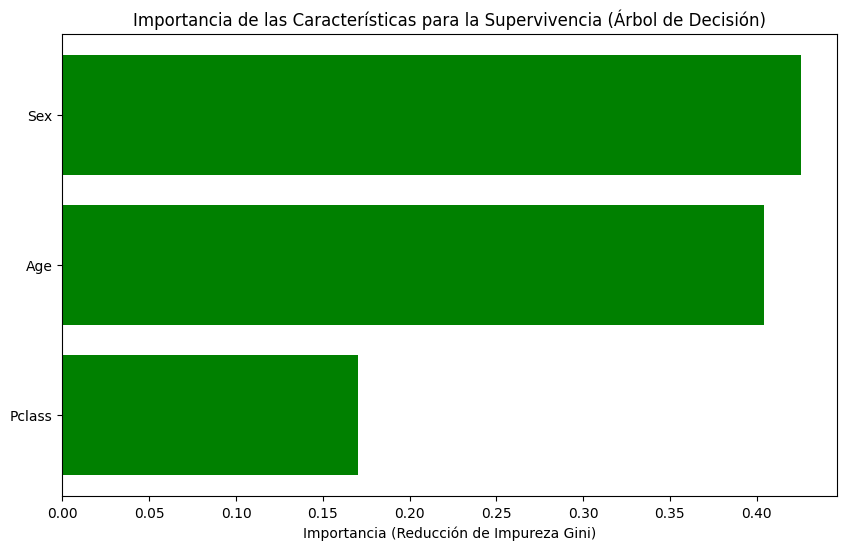

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


df = pd.read_csv("titanic-train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


importances = dt_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame(
    {
        'Característica': feature_names,
        'Importancia (Gini)': importances
    }
)

feature_importance_df = feature_importance_df.sort_values(by='Importancia (Gini)', ascending=False)

print("--- Importancia de las Características (Árbol de Decisión) ---")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia (Gini)'], color='green') # Changed color to green
plt.xlabel("Importancia (Reducción de Impureza Gini)")
plt.title("Importancia de las Características para la Supervivencia (Árbol de Decisión)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("titanic-train.csv")
df = df[["Survived", "Pclass", "Sex", "Age"]]
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


coefficients = pd.DataFrame(
    {'Feature': X.columns, 'Coefficient': model.coef_[0]}
)

coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])

coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

print("--- Coeficientes del Modelo de Regresión Logística ---")
print(coefficients)

--- Coeficientes del Modelo de Regresión Logística ---
  Feature  Coefficient  Absolute Coefficient
1     Sex     2.532197              2.532197
0  Pclass    -1.248735              1.248735
2     Age    -0.042532              0.042532
